<h1> Solution guide of the Individual work LLSMS2012: updated every lecture </H1>
<h3> Authors: Casalino Gabriele and Ortiz Miguel </h3>
<p>Date: March 2024 </p>

In [31]:
# Loading all the powers
import pandas as pd
import numpy as np
import pyreadstat
import pyarrow.feather as feather
import datetime
from datetime import date
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
import yfinance as yf
import random 
from scipy.stats import norm
import math
import statsmodels.api as sm

pd.pandas.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format

# Visualisation powers
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

<h2>2. Time series </h2>

1. A stock price $x_t$ follows an $AR(1)$ process, i.e

\begin{gather*}
x_t = ρx_{t−1} + ε_t
\end{gather*}

where $ε_t$ are a sequence of i.i.d. normally distributed random variables with mean 0 and standard deviation $σ_ε$


In [2]:
# Set up the variables
np.random.seed(1234)
n = 20
sige = np.random.uniform(size=20)
rho = np.random.uniform(size=1)
x = np.zeros((n, 1))
w = np.random.normal(loc=0, scale=sige)
x[0] = np.random.uniform(1, 5)

In [3]:
# Now let's generate the variable x

for t in range(1, n):
    x[t] = rho**(t-1) * x[t-1] + rho**(t-2) * w[t-1] + w[t]

Text(0, 0.5, 'Price')

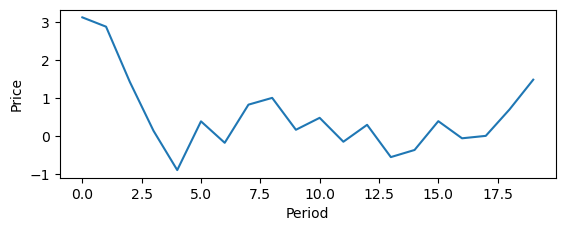

In [4]:
# Let's take a look
plt.subplot(2,1,1)
plt.plot(x)
plt.xlabel("Period")
plt.ylabel("Price")

In [5]:
# To get the conditional mean

Ex = np.zeros((n, 1))
Ex[0] = x[0]
for t in range(1, n):
    Ex[t] = rho**(t-1) * Ex[0]

Text(0, 0.5, 'Conditional mean')

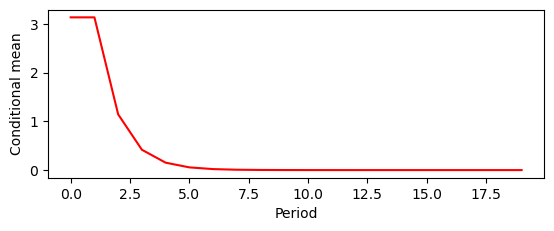

In [6]:
# Question a

# Let's take a look of the conditional mean
# To plot the conditional means
plt.subplot(2,1,1)
plt.plot(Ex, color = "red")
plt.xlabel("Period")
plt.ylabel("Conditional mean")

Question a. In the graph we can see how the conditional mean finds its "stable" value as we update the information each time.

In [7]:
# To get also the conditional variance

sigx = np.zeros((n, 1))
sigx[0] = np.random.uniform()
for t in range(1, n):
    sigx[t] = (((1 - rho**(2*(t-1))) / (1 - rho**2))**0.5) * sige[t]
Varx = sigx**2


Text(0, 0.5, 'Conditional variance')

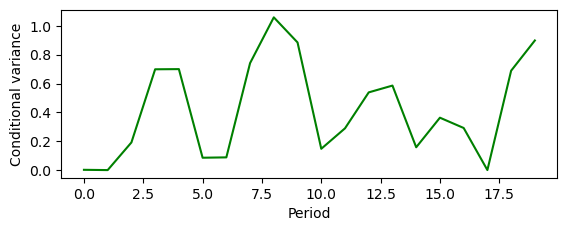

In [8]:
# Question b

# Let's take a look of the conditional variance
# To plot the conditional variance
plt.subplot(2,1,1)
plt.plot(Varx, color = "green")
plt.xlabel("Period")
plt.ylabel("Conditional variance")

Question b. In the graph we can verify that indeed the conditioned variance does not present a stable behavior, complying with its nature as programmed.

Question c. According to the sugesstion we might update the data generator process.

In [9]:
np.random.seed(1234)
n = 20
sige = 0.25
rho = 0.95
x = np.zeros((n, 1))
w = np.random.normal(loc=0, scale=sige, size=n)
x[0] = 1  # known information at time t=1

In [10]:
# Now let's generate the variable x
for t in range(1, n):
    x[t] = rho**(t-1) * x[t-1] + rho**(t-2) * w[t-1] + w[t]

Text(0, 0.5, 'Price')

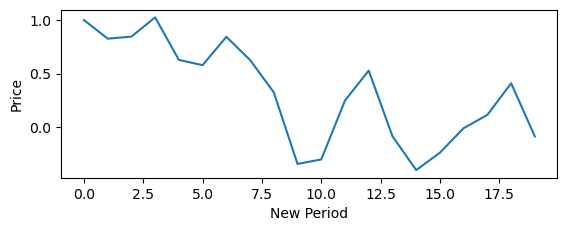

In [11]:
# Let's take a look
plt.subplot(2,1,1)
plt.plot(x, )
plt.xlabel("New Period")
plt.ylabel("Price")

In [12]:
# To get the conditional mean

Ex = np.zeros((n, 1))
Ex[0] = x[0]
for t in range(1, n):
    Ex[t] = rho**(t-1) * Ex[0]

Text(0, 0.5, 'New Conditional mean')

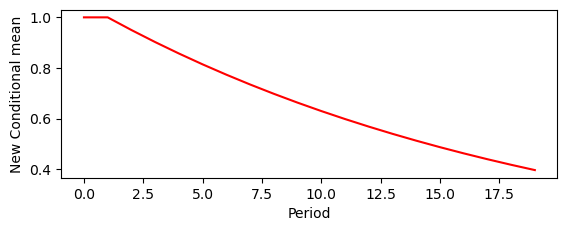

In [13]:
# Question C.i

# Let's take a look of the conditional mean
# To plot the conditional means
plt.subplot(2,1,1)
plt.plot(Ex, color = "red")
plt.xlabel("Period")
plt.ylabel("New Conditional mean")

In [14]:
# To get also the conditional variance

sigx = np.zeros((n, 1))
sigx[0] = np.random.uniform()
for t in range(1, n):
    sigx[t] = (((1 - rho**(2*(t-1))) / (1 - rho**2))**0.5) * sige
Varx = sigx**2


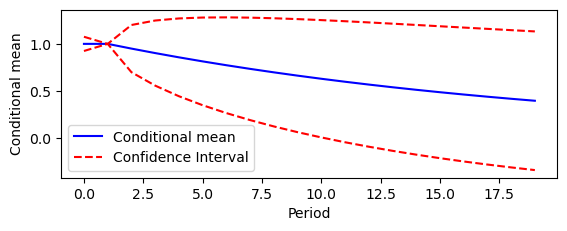

In [27]:
# Question C.ii

# Let's take a look of the conditional mean
# To plot the conditional means and the confidence bounds
# To calculate upper and lower confidence bounds
plt.subplot(2,1,1)
upper_bound = Ex + sigx
lower_bound = Ex - sigx

plt.plot(Ex, color='blue', label='Conditional mean')

# Plot confidence intervals
plt.plot(upper_bound, color='red', linestyle='--')
plt.plot(lower_bound, color='red', linestyle='--',label='Confidence Interval')

# Set plot limits and labels
# plt.xlim(1, 20)
# plt.ylim(-1, 1.5)
plt.xlabel('Period')
plt.ylabel('Conditional mean')
plt.legend()

# Show plot
plt.show()

Text(0, 0.5, 'Conditional variance')

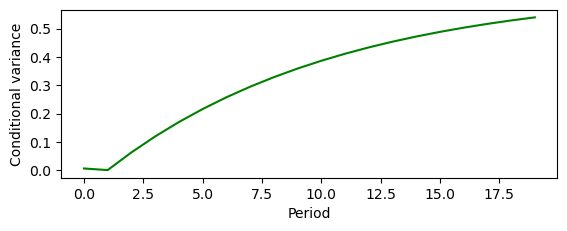

In [16]:
# Let's take a look of the conditional variance
# To plot the conditional variance
plt.subplot(2,1,1)
plt.plot(Varx, color = "green")
plt.xlabel("Period")
plt.ylabel("Conditional variance")

In this case, it is noted that the conditional variance shows an increasing trend, as specified by the exercise parameters. This means that as we move away from time $t$, any data generated with today's information is more likely to deviate from the conditional mean.

In [17]:
# For 90% confidence interval then alpha/2 = 0.05 (normal distribution)
alpha = 0.1
cheb_90 = math.sqrt(1 / (1 - alpha))

# 95% confidence interval for Chebychev inequality
alpha = 0.05
cheb_95 = math.sqrt(1 / (1 - alpha))

# For 90% confidence interval then alpha/2 = 0.05 (normal distribution)
xi90N = norm.ppf(0.95) 

# For 95% confidence interval then alpha/2 = 0.025 (normal distribution)
xi95N = norm.ppf(0.975)  


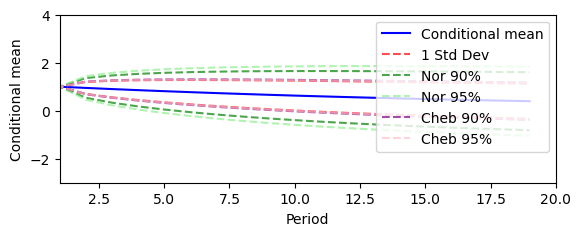

In [39]:
# Now let's take a look to compare as suggested

plt.plot(Ex, color='blue', label='Conditional mean')

# Plot confidence intervals
plt.plot(Ex + sigx, color='red', linestyle='--', label='1 Std Dev', alpha=0.7)
plt.plot(Ex - sigx, color='red', linestyle='--', alpha=0.7)
plt.plot(Ex + xi90N * sigx, color='green', linestyle='--', label='Nor 90%', alpha=0.7)
plt.plot(Ex - xi90N * sigx, color='green', linestyle='--', alpha=0.7)
plt.plot(Ex + xi95N * sigx, color='lightgreen', linestyle='--', label='Nor 95%', alpha=0.7)
plt.plot(Ex - xi95N * sigx, color='lightgreen', linestyle='--', alpha=0.7)
plt.plot(Ex + cheb_90 * sigx, color='purple', linestyle='--', label='Cheb 90%', alpha=0.7)
plt.plot(Ex - cheb_90 * sigx, color='purple', linestyle='--', alpha=0.7)
plt.plot(Ex + cheb_95 * sigx, color='pink', linestyle='--', label='Cheb 95%', alpha=0.7)
plt.plot(Ex - cheb_95 * sigx, color='pink', linestyle='--', alpha=0.7)

# Set plot limits and labels
plt.xlim(1, 20)
plt.ylim(-3, 4)
plt.xlabel('Period')
plt.ylabel('Conditional mean')
plt.legend()

# Show plot
plt.show()

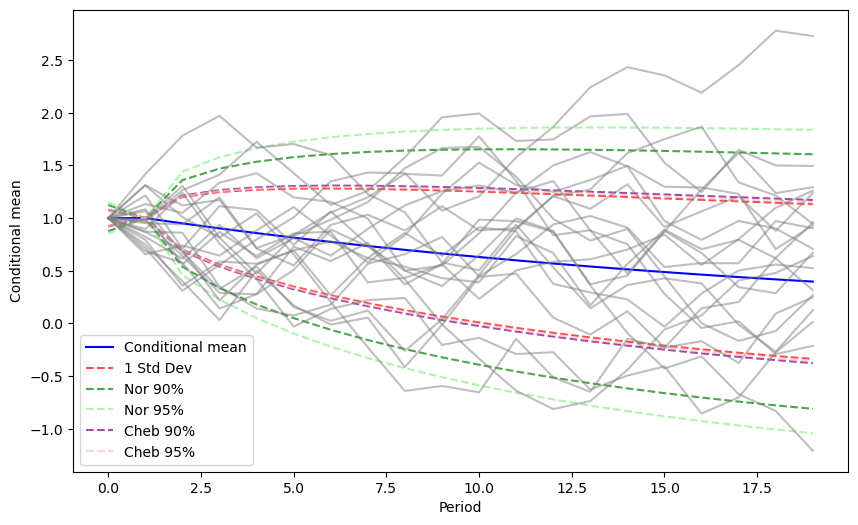

In [19]:
# Question C.iii
# To set a seed for future replications and consistent results
np.random.seed(1234)

# Plot settings
plt.figure(figsize=(10, 6))

plt.plot(Ex, color='blue', label='Conditional mean')

# Plot confidence intervals
plt.plot(Ex + sigx, color='red', linestyle='--', label='1 Std Dev', alpha=0.7)
plt.plot(Ex - sigx, color='red', linestyle='--', alpha=0.7)
plt.plot(Ex + xi90N * sigx, color='green', linestyle='--', label='Nor 90%', alpha=0.7)
plt.plot(Ex - xi90N * sigx, color='green', linestyle='--', alpha=0.7)
plt.plot(Ex + xi95N * sigx, color='lightgreen', linestyle='--', label='Nor 95%', alpha=0.7)
plt.plot(Ex - xi95N * sigx, color='lightgreen', linestyle='--', alpha=0.7)
plt.plot(Ex + cheb_90 * sigx, color='purple', linestyle='--', label='Cheb 90%', alpha=0.7)
plt.plot(Ex - cheb_90 * sigx, color='purple', linestyle='--', alpha=0.7)
plt.plot(Ex + cheb_95 * sigx, color='pink', linestyle='--', label='Cheb 95%', alpha=0.7)
plt.plot(Ex - cheb_95 * sigx, color='pink', linestyle='--', alpha=0.7)

# Plot simulated paths
for i in range(20):
    x = np.zeros(n)
    x[0] = 1
    for t in range(1, n):
        x[t] = rho * x[t-1] + sige * np.random.uniform(-1.9, 1.9)
    plt.plot(x, color='grey', alpha=0.5)

plt.xlabel('Period')
plt.ylabel('Conditional mean')
plt.legend()

# Show plot
plt.show()

Following the guggestion of the smiluation the purpose of this graph is to illustrate the concept of mean reversion in the time series data. Take in count that the simulated random data are colored in grey but the conditional mean of our main varaible is colored in blue.

By simulating multiple paths of the series, we observe how the series tends to revert towards its conditional mean over time. As time progresses, uncertainty about the future values of the series increases, leading to divergence among the simulated paths. In some periods the series simiultaed goes beyond the confidence interval calculated with the Chebychev inequality and normal distribuited shocks.

However, despite this uncertainty, there is a clear tendency for the series to gravitate towards its conditional mean. The regions denoted by the confidence intervals (green, and purple bounds) around the conditional mean represent the confidence intervals (including the one conditional standard deviation in red), highlighting the increasing uncertainty as we move further into the future. 

In summary, by observing these simulated series we gain a sense of how uncertainty about the future builds up through time.

In [25]:
# Question d

# To find the uncodntional mean of the serie
print("The unconditional mean of xt is:", Ex.mean(), sep='\n')

# To find the uncodntional variance of the serie
print("The unconditional variance of xt is:", Ex.std()**2, sep='\n')



The unconditional mean of xt is:
0.6726463974646921
The unconditional variance of xt is:
0.03734387969757885


____________________


2. In this problem, I want you to think about how returns look at different time horizons, and how
predictability of returns might change that...

In [29]:
# Question a

# set up the seed
np.random.seed(12)  
# Random mean of the log returns
mu = np.random.uniform(-0.05, 0.05, size=1)  
sigma = np.random.uniform(0.01, 0.2, size=1)
# Years
n_years = 20  
# NYSE Trading days per year  
n_ret = 252  
log_ret = np.random.normal(loc=mu, scale=sigma, size=n_years * n_ret)


In [48]:
# Check the mean and variance of the log returns
mean_log_ret = np.mean(log_ret) 
std_log_ret = np.sqrt(np.var(log_ret))

# Calculate annualized log return
ann_log_ret = np.mean((1/20) * log_ret)

# To display the mean of the log return
print("The mean of the log returns is:", mean_log_ret, sep='\n')

# To display the std of the log return
print("The std of the log returns is:", std_log_ret, sep='\n')

# To display the annualized log return
print("The annualized log return is:", ann_log_ret, sep='\n')

The mean of the log returns is:
0.059231787467179525
The std of the log returns is:
0.039647857108531616
The annualized log return is:
0.0029615893733589767


In [35]:
# Perform Ljung-Box test
lb_test = sm.stats.acorr_ljungbox(log_ret, lags=10)

In [38]:
# To check the Ljung-Box test outputs
lb_test

,lb_stat,lb_pvalue
1,1.59873,0.20608
2,1.78321,0.41000
3,2.68018,0.44361
4,3.15530,0.53218
5,3.30871,0.65251
6,3.32155,0.76754
7,3.34149,0.85172
8,3.70423,0.88277
9,7.01457,0.63560
10,8.89416,0.54218


Now lets analyze the situation when the mean annual return is 6% as suggested

In [45]:
# set up the seed
np.random.seed(12)  
# Mean annual return 6%
mu = 0.06 
sigma = np.random.uniform(0.01, 0.2, size=1)
# Years
n_years = 20  
# NYSE Trading days per year  
n_ret = 252  
log_ret = np.random.normal(loc=mu, scale=sigma, size=n_years * n_ret)

# To get the mean and variance of the log returns
mean_log_ret = np.mean(log_ret)
std_log_ret = np.sqrt(np.var(log_ret))
 # To get the annualized log returns
ann_log_ret = np.mean((1/20) * log_ret)
# Mean Monthly returns
mean_monthly_ret = ann_log_ret / 12  
# Mean annualized monthly returns
ann_monthly_ret = (1 + mean_monthly_ret) ** 12 - 1  

In [49]:
# To display the Mean Monthly returns
print("The Mean Monthly returns is:", mean_monthly_ret, sep='\n')

# To display the Mean annualized monthly returns
print("The Mean annualized monthly returns is:", ann_monthly_ret, sep='\n')

The Mean Monthly returns is:
0.0002467991144465814
The Mean annualized monthly returns is:
0.002965612729333822


Question a. So we found that the mean monthly return is close to 0.025% when the mean annual return is 6%. Also we found that the mean annualized monthly return is close to 0.29%.

In [52]:
# Question b

# To get the variance of log returns
var_log_ret = np.var(log_ret)  
 # To get the annualized log variance
ann_log_var = np.var((1/20) * log_ret) 

# To display variance log long-horizon return
print("The variance log long-horizon return is:", var_log_ret, sep='\n')

# To display the annualized log long horizon variance
print("The the annualized log long horizon variance is:", ann_log_var, sep='\n')

The variance log long-horizon return is:
0.0015719525732985407
The the annualized log long horizon variance is:
3.929881433246352e-06


Question b. Following our analysis we found that the variance log long-horizon return is close to 0.157% and the annualized log long horizon variance is close to 0.0000039%

In [53]:
# Question c

# Calculate standard deviation of log returns
std_log_ret = np.sqrt(np.var(log_ret))

# Calculate annualized log standard deviation
ann_log_std = np.sqrt(np.var((1/20) * log_ret))

# To display the standard deviation log long-horizon return
print("The standard deviation log long-horizon return is:", std_log_ret, sep='\n')

# To display the annualized log long horizon standard deviation
print("The the annualized log long horizon variance is:", ann_log_std, sep='\n')

The standard deviation log long-horizon return is:
0.039647857108531616
The the annualized log long horizon variance is:
0.0019823928554265806


In [54]:
# The second part of the questions is set the std of annual returns as 16%

sigma = 0.16
log_ret = np.random.normal(loc=mu, scale=sigma, size=n_years * n_ret)

# Calculate monthly and daily log standard deviation
monthly_log_std = np.sqrt(np.var((1/20) * log_ret)) / 12
daily_log_std = np.sqrt(np.var((1/20) * log_ret)) / 252

# To display the standard deviation of monthly return
print("The standard deviation log long-horizon return is:", monthly_log_std, sep='\n')

# To display the standard deviation of daily return
print("The annualized log long horizon variance is:", daily_log_std, sep='\n')


The standard deviation log long-horizon return is:
0.0006633464135499225
The the annualized log long horizon variance is:
3.1587924454758215e-05


<p>Question c. Following our analysis we found that the standard deviation log long-horizon return was close to 3.96% and the annualized log long horizon standard deviation was close to 0.0020%.</p>
<p>When we assumed that the standard deviation of annual returns was 16% then we got that the standard deviation of monthly return was close to 0.0007% and the standard deviation of daily return was even lower 0.0032%.</p>  

In [56]:
# Question d

# Following the suggestions: A stock has a mean and standard deviation of monthly returns equal to 1%
mean_monthly_ret = 0.01
monthly_log_std = 0.01

# Calculate mean annualized monthly returns
ann_monthly_ret = (1 + mean_monthly_ret) ** 12 - 1

# Calculate annualized log standard deviation
ann_log_std = monthly_log_std * np.sqrt(12)

# To display the mean annualized monthly returns
print("The mean annualized monthly returns is:", ann_monthly_ret, sep='\n')

# To display the annualized log standard deviation
print("The annualized log standard deviation is:", ann_log_std, sep='\n')

The mean annualized monthly returns is:
0.12682503013196977
The annualized log standard deviation is:
0.034641016151377546


<p>Question d. Assuming that a stock has a mean and standard deviation of monthly returns equal to 1% then we found that the mean annualized monthly returns was close to 0.13% and the annualized log standard deviation was close to 0.03%.</p>

In [57]:
# Question e

# Calculate Sharpe ratio for monthly returns
Sharpe_ratio_m = mean_log_ret / (np.sqrt(var_log_ret))

# Calculate Sharpe ratio for annualized returns
Sharpe_ratio_a = ann_log_ret / (np.sqrt(ann_log_var))

# To display the Sharpe ratio for monthly returns
print("The Sharpe ratio for monthly returns is:", Sharpe_ratio_m, sep='\n')

# To display the Sharpe ratio for annualized returns
print("The Sharpe ratio for annualized returns is:", Sharpe_ratio_a, sep='\n')

The Sharpe ratio for monthly returns is:
1.4939467549290009
The Sharpe ratio for annualized returns is:
1.493946754929001


<p>Question e. Upon calculation, we discovered that the Sharpe ratio stands at 1.49. Notably, the Sharpe ratio remains consistent regardless of whether we express returns on an annual or monthly basis. This indicates that the risk-adjusted return of the stock is robust, irrespective of the chosen time annualized or monthly.</p>

<p>On the other hand, in this case the a Sharpe ratio of 1.49 suggests that the investment is delivering a strong risk-adjusted return, which is typically desirable for investors seeking a balance between risk and return. In other words, it indicates that the investment is generating excess return relative to its risk level, for each unit of risk (standard deviation), the asset is giving 1.49 units of excess return.</p>

In [61]:
# Question f

# To set up the variables following the parameters suggested
# Mean returns
m = 0.08
# Variance of returns
v = 0.04
# Risk aversion
aversion = 2
share = (1/aversion) * (m/v)
# Increase the time horizon
np.random.seed(12)
# Standard deviation of returns
std = 0.2
# Returns generator
ret = np.random.normal(loc=m, scale=std, size=10*n_ret)
# Mean
m1 = np.mean(ret)
# Var
v1 = np.var(ret)
# Stock share
share1 = (1/aversion) * (m1/v1)

# To display Stock share
print("The Stock share is:", share1, sep='\n')

The Stock share is:
0.9226619916504357


Question f. While it's a common belief that a longer time horizon warrants a higher allocation to risky assets in a portfolio, our analysis reveals a nuanced perspective. For a long-term investor, our findings suggest that allocating approximately 92% of their wealth to risky assets and 8% to risk-free assets may be optimal.

This allocation strategy acknowledges the potential benefits of holding risky assets, such as stocks, over the long term, while also recognizing the importance of mitigating risk through diversification and allocation to risk-free assets, such as bonds or cash.

Question g. It is well known the variability in portfolio compositions among investors, indicating that there is no definitive guideline regarding whether an extended time horizon necessarily results in a higher allocation to risky assets. The misconception often lies in the investor's assumption regarding the correlation between returns and an elongated time frame.

Text(0, 0.5, 'Returns')

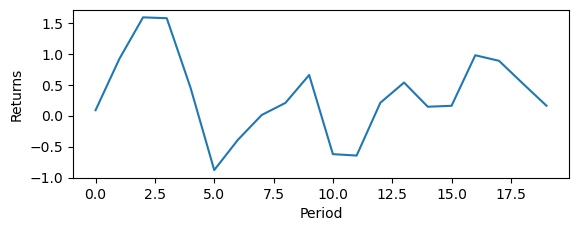

In [72]:
# Question h.i.A

# To setu up the returns following the suggestions

np.random.seed(123)
n = 20
mu = np.random.uniform()
sigepsilon = np.random.uniform(size=n)
epsilon = np.random.normal(loc=0, scale=sigepsilon, size=n)
r = np.zeros((n, 1))
delta = np.random.uniform()
r[0] = np.random.uniform(0.01, 0.10)

# To generate the returns
for t in range(1, n):
    r[t] = mu + epsilon[t] + delta * epsilon[t-1]  

# Let's take a look
plt.subplot(2,1,1)
plt.plot(r)
plt.xlabel("Period")
plt.ylabel("Returns")

In [73]:
# Question h.i.A

E_r = np.mean(r)
Var_r = np.var(r)

# To get the cov between t and t+1
cov1 = np.cov(r[:-1, 0], r[1:, 0])[0, 1]
# To get the cov between t and t+2
cov2 = np.cov(r[:-2, 0], r[2:, 0])[0, 1]
# To get the cov between t and t-1
cov3 = np.cov(r[:-1, 0], r[:-n:-1, 0])[0, 1]
# To get the cov between t and t-2
cov4 = np.cov(r[1:, 0], r[:n-1, 0])[0, 1] 

The cov between t and t+1 is:
0.23863495319026679
The cov between t and t+2 is:
-0.0664713637163917
The cov between t and t-1 is:
0.17138824164797392
The cov between t and t-2 is:
0.23863495319026679


In [74]:
# To display cov between t and t+1
print("The cov between t and t+1 is:", cov1, sep='\n')
# To display cov between t and t+2
print("The cov between t and t+2 is:", cov2, sep='\n')
# To display cov between t and t-1
print("The cov between t and t-1 is:", cov3, sep='\n')
# To display the cov between t and t-2
print("The cov between t and t-2 is:", cov4, sep='\n')


The cov between t and t+1 is:
0.23863495319026679
The cov between t and t+2 is:
-0.0664713637163917
The cov between t and t-1 is:
0.17138824164797392
The cov between t and t-2 is:
0.23863495319026679


Question h.i.A. The difference arises due to the MA(1) process, where the covariances are non-zero, indicating a correlation between returns over time. On the other hand, in the previous AR(1) process, independence was assumed, with a covariance of 0

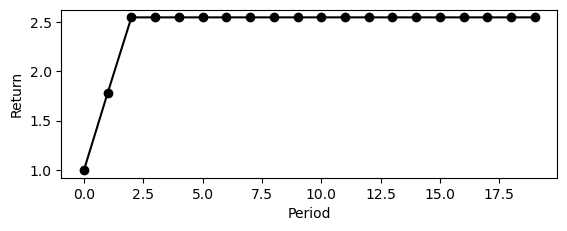

In [155]:
# Question h.i.B

# Your data generation code
np.random.seed(123)
n = 20
mu = np.random.uniform()
sigepsilon = np.random.uniform(size=n)
epsilon = np.zeros((n, 1))
delta = np.random.uniform()
epsilon[0] = 0.1
r = np.zeros((n, 1))
r[0] = 1

# To generate the returns with impulse response
for t in range(1, n):
    epsilon[t] = 1
    r[t] = mu + epsilon[t] + delta * epsilon[t-1]

# Plot impulse response function for r
plt.subplot(2,1,1)
plt.plot(r, marker='o', color="black")
plt.xlabel('Period')
plt.ylabel('Return')
# plt.grid(True)
plt.show()


We observe that following the impulse, the response of the returns initially increases up to time $t=3$. However, after this point, the response stabilizes and remains constant.

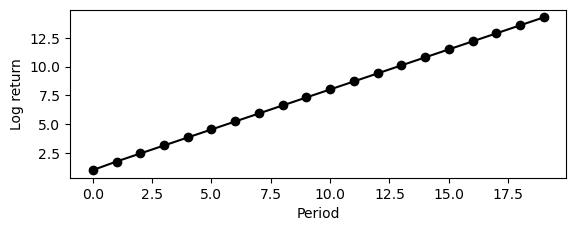

In [154]:
# Calculate cumulative sum for r
p = np.cumsum(r)

# Plot impulse response function for p
plt.subplot(2,1,1)
plt.plot(p, marker='o', color="black")
plt.xlabel('Period')
plt.ylabel('Log return')
# plt.title('Impulse Response Function for p')
plt.show()

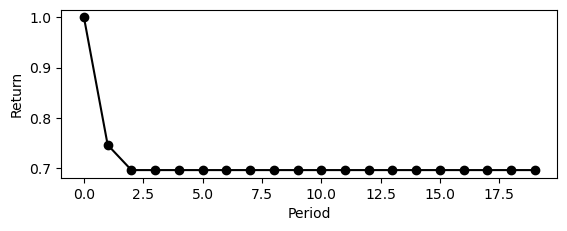

In [153]:
# Set the variables
epsilon = np.zeros((n, 1))
epsilon[0] = 0.1
r[0] = 1

# Generate impulse response function for r
for t in range(1, n):
    r[t] = mu + epsilon[t] + delta * epsilon[t-1]

# Plot impulse response function for r
plt.subplot(2,1,1)
plt.plot(r, marker='o', color="black")
plt.xlabel('Period')
plt.ylabel('Return')
# plt.title('Impulse Response Function for r')
plt.show()

When we suppose $r_1 = ϵ_1 = 1$ and all future $ϵ = 0$, then we get performance similar to the past analysis, following the impulse, the response of the returns initially increases and after the response stabilizes and remains constant.

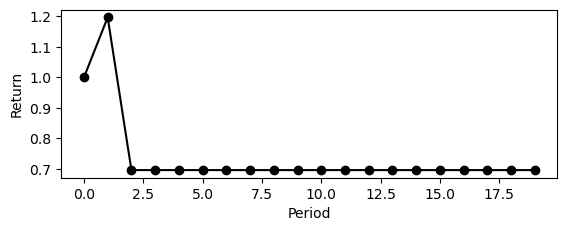

In [157]:
# Following the momentum suggestion
delta = 0.5

# Generate impulse response function for r with momentum
for t in range(1, n):
    r[t] = mu + epsilon[t] + delta * epsilon[t-1]

# Plot impulse response function for r with momentum
plt.subplot(2,1,1)
plt.plot(r, marker='o', color="black")
plt.xlabel('Period')
plt.ylabel('Return')
#plt.title('momentum')
plt.show()

Analysis the impulse response of the return driven by momentum $δ = 0.5$ then we get that the return increase in the first period after the shock, but then the response of the returns stabilizes and remains constant.

Text(0.5, 1.0, 'Impulse Response Function for r, i.i.d. return benchmark')

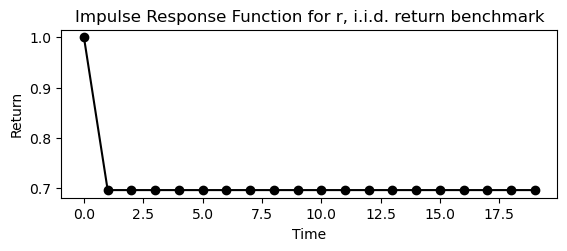

In [134]:
# i.i.d. return benchmark
delta = 0
for t in range(1, n):
    r[t] = mu - epsilon[t] + delta * epsilon[t-1] 
plt.subplot(2,1,1)
plt.plot(r, marker='o', color="black")
plt.xlabel('Period')
plt.ylabel('Return')
# plt.title('Impulse Response Function for r, i.i.d. return benchmark')


In this case, taking momentum by $δ = 0$ (i.i.i return benchmark) then we get that the return does not reflect any effect, the response of the returns remains constant.

Text(0, 0.5, 'Return')

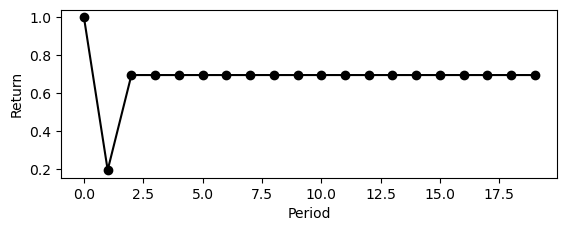

In [158]:
# Mean reversion
delta = -0.5
for t in range(1, n):
    r[t] = mu - epsilon[t] + delta * epsilon[t-1] 
plt.subplot(2,1,1)
plt.plot(r, marker='o', color="black")
plt.xlabel('Period')
plt.ylabel('Return')
# plt.title('Impulse Response Function for r, mean reversion')

In this case, taking momentum by $δ = -0.5$ (mean reversion) then we get that the returns decreases during the first period but then the response of the returns remains constant.

In [160]:
# Question h.ii

# Set delta values
np.random.seed(123)
delta_momentum = 0.5  # momentum

# Initialize variables
r = np.zeros((n, 1))
epsilon = np.zeros((n, 1))
epsilon[0] = 1
r[0] = 1

# Generate impulse response function for r with delta as momentum
for t in range(1, n):
    r[t] = mu + epsilon[t] + delta_momentum * epsilon[t-1]

# Calculate mean and variance for long horizon with momentum
mean_long_hor_momentum = np.mean(r)
var_long_hor_momentum = np.var(r)

# To display the mean for long horizon
print("The momentum returns mean for long horizon is:", mean_long_hor_momentum, sep='\n')

# To display the variance for long horizon
print("The momentum returns variance for long horizon is:", var_long_hor_momentum, sep='\n')


The mean for long horizon is:
0.7366457263179684
The variance for long horizon is:
0.015492393340346855


In [161]:
# Question h.ii

# Set delta values
np.random.seed(123)
delta_mean_reversion = -0.5  # mean reversion

# Generate impulse response function for r with delta as momentum
for t in range(1, n):
    r[t] = mu + epsilon[t] + delta_mean_reversion * epsilon[t-1]

# Calculate mean and variance for long horizon with momentum
mean_long_hor_mean_reversion = np.mean(r)
var_long_hor_mean_reversion = np.var(r)

# To display the mean for long horizon
print("The mean reversion returns mean for long horizon is:", mean_long_hor_mean_reversion, sep='\n')

# To display the variance for long horizon
print("The mean reversion returns variance for long horizon is:", var_long_hor_mean_reversion, sep='\n')

The mean for long horizon is:
0.6866457263179685
The variance for long horizon is:
0.017010047412357548


<p>Question h.ii. We found that for the momentum case the mean for long horizon returns was close to 0.74 and the variance for long horizon was close to 0.015%.

On the other hand, when analyzing the mean reversion case we got that the mean for long horizon returns was close to 0.69 and the variance for long horizon was close to 1.7% 

So in other words, in the momentum scenario, we observed that the mean for long-horizon returns was approximately 0.74, indicating a relatively higher expected return over the long term. Additionally, the variance for long-horizon returns was close to 0.015%, suggesting relatively lower volatility compared to the mean reversion case.

Conversely, in the mean reversion scenario, we found that the mean for long-horizon returns was around 0.69, slightly lower than the momentum case. However, the variance for long-horizon returns was approximately 1.7%, indicating significantly higher volatility compared to the momentum case.

These findings provide further insight into the characteristics of each scenario. While the momentum case offers a higher expected return with relatively lower volatility over the long term, the mean reversion case presents a slightly lower expected return but with significantly higher volatility. So the main adviced taken from this analysis reflects that investors must weigh these factors carefully when considering their investment strategies, balancing the potential for higher returns against the increased risk associated with volatility.</p>

<h2>3. Stock Market </h2>

In [169]:
from sklearn import preprocessing

<h3>3.1 Efficient Frontier </h3>

In [157]:
VEUSX = yf.download("VEUSX", start="2015-01-01", end="2024-03-31")
VBLIX = yf.download("VBLIX", start="2015-01-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


In [175]:
VEUSX.resample('1M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,63.21762,63.21762,63.21762,63.21762,54.08073,0.00000
2019-02-28,65.66947,65.66947,65.66947,65.66947,56.17822,0.00000
2019-03-31,67.32905,67.32905,67.32905,67.32905,57.68872,0.00000
2019-04-30,69.00095,69.00095,69.00095,69.00095,59.35617,0.00000
2019-05-31,67.46773,67.46773,67.46773,67.46773,58.03726,0.00000
...,...,...,...,...,...,...
2023-11-30,74.64905,74.64905,74.64905,74.64905,74.12089,0.00000
2023-12-31,79.02950,79.02950,79.02950,79.02950,78.75321,0.00000
2024-01-31,79.14619,79.14619,79.14619,79.14619,79.14619,0.00000


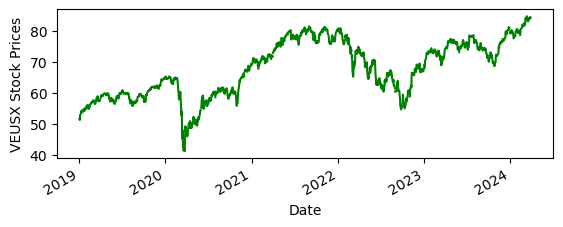

In [171]:
plt.subplot(2,1,1)
VEUSX['Adj Close'].resample('1M').plot(color='green')
plt.ylabel("VEUSX Stock Prices")
plt.show()

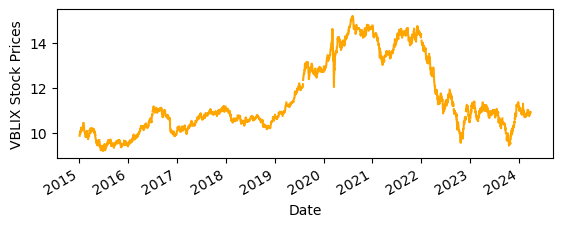

In [172]:
plt.subplot(2,1,1)
VBLIX['Adj Close'].resample('1M').plot(color='orange')
plt.ylabel("VBLIX Stock Prices")
plt.show()

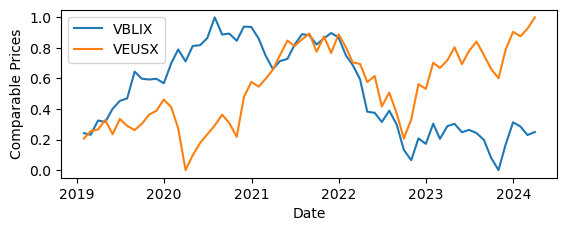

In [228]:
# Here we select monthly Adj Close Prices for each Stock and normalize on the same scale each price to make them comparable
df = pd.DataFrame(VBLIX['Adj Close'].resample('1M').last())
df.rename(columns = {'Adj Close':'VBLIX'}, inplace = True)

df_1 = pd.DataFrame(VEUSX['Adj Close'].resample('1M').last())
df_1.rename(columns = {'Adj Close':'VEUSX'}, inplace = True)

df_2 = pd.merge(df, df_1, on='Date')

scaler = preprocessing.MinMaxScaler()
df_2[:] = scaler.fit_transform(df_2)

plt.subplot(2,1,1)
plt.plot(df_2, label=["VBLIX","VEUSX"])
plt.xlabel("Date")
plt.ylabel("Comparable Prices")
plt.legend(loc="upper left")

In [229]:
# To compute the means for each asset
df_2.mean()


VBLIX   0.52607
VEUSX   0.54664
dtype: float64

In [230]:
# To compute the variance and covariance matrix
df_2.cov()

,VBLIX,VEUSX
VBLIX,0.08090,-0.00717
VEUSX,-0.00717,0.06339
